<a href="https://colab.research.google.com/github/abiyasa05/Machine_Learning_Ganjil_2023/blob/main/Jobsheet_11_Convolutional_Neural_Network_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link GIthub: (https://github.com/abiyasa05/Machine_Learning_Ganjil_2023/blob/main/Jobsheet_11_Convolutional_Neural_Network_(CNN).ipynb)

# **Praktikum 1**

Klasifikasi 🐱 dan 🐶

# **Deskripsi**

Pada praktikum ini kita akan membuat model klasifikasi CNN sederhana pada kasus citra kucing dan anjing.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# **Langkah 1 - Import Library**

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# **Langkah 2 - Pra Pengolahan Data**

Pada tahap ini kita akan sedikit melakukan manipulasi pada citra yang digunakan. Manipulasi yang dilakukan diantaranya adalah normalisasi nilai piksel, koreksi kemiringan, pembesaran (zoom), dan flip.

# **Langkah 2.1. Pra Pengolahan Data Training**

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Machine Learning/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8010 images belonging to 2 classes.


# **Langkah 2.2. Pra Pengolahan Data Testing**

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Machine Learning/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


# **Langkah 3 - Pembuatan Model CNN**

# **Langkah 3.1.  - Inisiasi Model CNN**

In [ ]:
cnn = tf.keras.models.Sequential()

# **Langkah 3.2. - Pembuatan Layer Konvolusi 1**

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# **Langkah 3.3 - Pembuatan Layer Pooling 1**

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# **Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2**

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# **Langkah 3.5 - Flattening**

In [ ]:
cnn.add(tf.keras.layers.Flatten())

# **Langkah 3.6 - Fully Connected Layer 1 (Input)**

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# **Langkah 3.7 - Fully Connected Layer 2 (Output)**

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# **Langkah 3.8 - Compile Model CNN**

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Penggunaan loss function binary crossentropy dikarenakan kita hanya melakukan klasifikasi pada dua kelas, yaitu kucing dan anjing.

# **Langkah 4 - Fit CNN**

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
251/251 [==============================] - 2577s 10s/step - loss: 0.6763 - accuracy: 0.5798 - val_loss: 0.6349 - val_accuracy: 0.6480
Epoch 2/25
251/251 [==============================] - 43s 171ms/step - loss: 0.6137 - accuracy: 0.6667 - val_loss: 0.5961 - val_accuracy: 0.6735
Epoch 3/25
251/251 [==============================] - 38s 153ms/step - loss: 0.5704 - accuracy: 0.7007 - val_loss: 0.5619 - val_accuracy: 0.7240
Epoch 4/25
251/251 [==============================] - 38s 151ms/step - loss: 0.5342 - accuracy: 0.7328 - val_loss: 0.5179 - val_accuracy: 0.7565
Epoch 5/25
251/251 [==============================] - 39s 154ms/step - loss: 0.5088 - accuracy: 0.7521 - val_loss: 0.4914 - val_accuracy: 0.7680
Epoch 6/25
251/251 [==============================] - 39s 154ms/step - loss: 0.4831 - accuracy: 0.7647 - val_loss: 0.4736 - val_accuracy: 0.7855
Epoch 7/25
251/251 [==============================] - 38s 150ms/step - loss: 0.4615 - accuracy: 0.7760 - val_loss: 0.4953 - val_ac

# **Langkah 5 - Prediksi dengan 1 Citra**

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Machine Learning/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 163ms/step


# **Praktikum 2**

Klasifikasi Multi-label dengan Data CIFAT

# **Deskripsi**

Pada praktikum ini kita akan membuat model CNN untuk mengklasifikasikan 10 objek dari dataset CIFAR. Dataset terdiri dari 60.000 citra dan setiap label terdiri dari 6.000 citra. Dataset telah dibagi menjadi 50.000 data training dan 10.000 data testing.

# **Langkah 1 - Load Library**



In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# **Langkah 2 - Unduh Dataset CIFAR**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 7s 0us/step


# **Langkah 3 - Verifikasi Data**

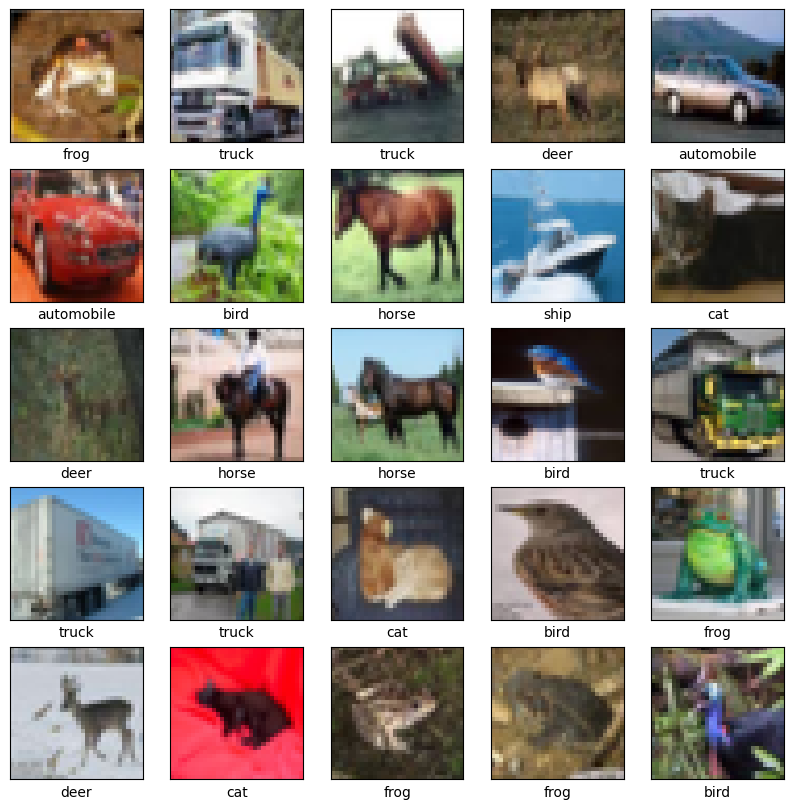

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# **Langkah 4 - Buat Model CNN**

# **Langkah 4.1. - Buat Layer Konvolusi**

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# **Langkah 4.2. - Cek Arsitektur Konvolusi**

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

# **Langkah 4.3. - Tambahkan Layer Fully Connected**

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# **Langkah 4.4. - Cek Arsitektur Model CNN**

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

# **Langkah 4.5. - Compile Model CNN**

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# **Langkah 5 - Fit Model**

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 12s 6ms/step - loss: 1.5142 - accuracy: 0.4456 - val_loss: 1.2581 - val_accuracy: 0.5475
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.1771 - accuracy: 0.5816 - val_loss: 1.1383 - val_accuracy: 0.5964
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0186 - accuracy: 0.6406 - val_loss: 1.0123 - val_accuracy: 0.6428
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9160 - accuracy: 0.6793 - val_loss: 0.9319 - val_accuracy: 0.6804
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8428 - accuracy: 0.7056 - val_loss: 0.8891 - val_accuracy: 0.6952
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7803 - accuracy: 0.7265 - val_loss: 0.9196 - val_accuracy: 0.6854
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7335 - accuracy: 0.7419 - val_loss: 0.8702 - val_accuracy

# **Langkah 6 - Evaluasi Model**

313/313 - 1s - loss: 0.8693 - accuracy: 0.7085 - 975ms/epoch - 3ms/step


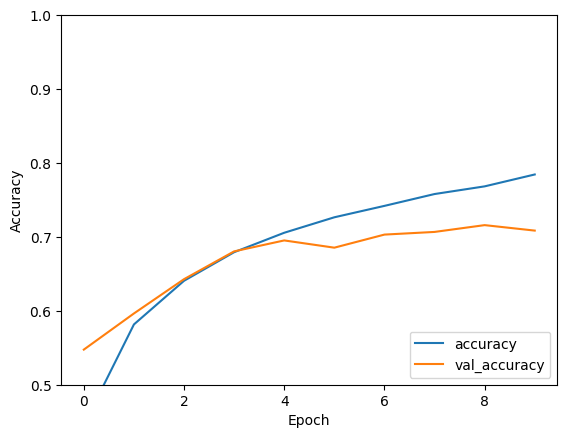

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# **Langkah 7 - Cetak Hasil Akurasi**

In [ ]:
print(test_acc)

0.7085000276565552


# **Tugas**

-   Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

# **Langkah 1: Impor pustaka dan modul yang diperlukan**

In [1]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image

# **Langkah 2: Memuat dataset CIFAR-10**

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

170498071/170498071 [==============================] - 4s 0us/step
Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


# **Langkah 3: Normalisasi data dan konversi label ke vektor one-hot encoded**

In [3]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# **Langkah 4: Memisahkan data latih menjadi data latih dan data validasi**

In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# **Langkah 5: Mendefinisikan model Convolutional Neural Network (CNN)**

In [6]:
def cnn_model():
    model = Sequential()
    # First Conv layer
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Second Conv layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Third, fourth, fifth convolution layer
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Fully Connected layers
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.summary()

    return model

# **Langkah 6: Membuat objek ImageDataGenerator dan mempersiapkan augmentasi data**

In [7]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(X_train)

# **Langkah 7: Membuat model dan mengompilasi**

In [8]:
model = cnn_model()
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0003),
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 256)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 256)         0

# **Langkah 8: Melatih model dengan ImageDataGenerator**

In [9]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    steps_per_epoch=len(X_train) // 64,
    epochs=125,
    validation_data=(X_valid, y_valid),
    verbose=1
)

Epoch 1/125
625/625 [==============================] - 51s 60ms/step - loss: 2.1542 - accuracy: 0.1987 - val_loss: 1.7714 - val_accuracy: 0.3541
Epoch 2/125
625/625 [==============================] - 33s 53ms/step - loss: 1.7352 - accuracy: 0.3552 - val_loss: 1.4966 - val_accuracy: 0.4608
Epoch 3/125
625/625 [==============================] - 33s 53ms/step - loss: 1.5526 - accuracy: 0.4361 - val_loss: 1.3362 - val_accuracy: 0.5219
Epoch 4/125
625/625 [==============================] - 32s 51ms/step - loss: 1.4190 - accuracy: 0.5030 - val_loss: 1.3133 - val_accuracy: 0.5374
Epoch 5/125
625/625 [==============================] - 33s 53ms/step - loss: 1.3195 - accuracy: 0.5469 - val_loss: 1.2111 - val_accuracy: 0.5764
Epoch 6/125
625/625 [==============================] - 33s 52ms/step - loss: 1.2369 - accuracy: 0.5816 - val_loss: 1.0696 - val_accuracy: 0.6393
Epoch 7/125
625/625 [==============================] - 33s 53ms/step - loss: 1.1705 - accuracy: 0.6097 - val_loss: 1.0597 - val_ac

# **Langkah 9: Mengevaluasi model pada set tes**

In [10]:
scores = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.7695 - accuracy: 0.8398


# **Langkah 10: Melakukan prediksi**

<Axes: >

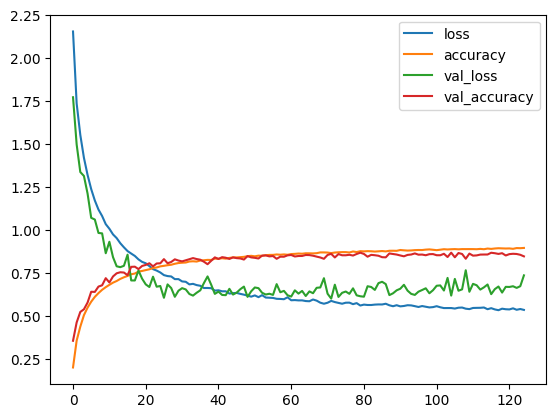

In [11]:
pd.DataFrame(history.history).plot()

# **Langkah 11: Tampilkan laporan klasifikasi**

In [12]:
scores = model.evaluate(X_test, y_test)
pred = model.predict(X_test)
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)
errors = y_pred - y_true != 0
print(classification_report(y_true, y_pred))

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1000
           1       0.92      0.92      0.92      1000
           2       0.85      0.76      0.80      1000
           3       0.81      0.58      0.67      1000
           4       0.84      0.82      0.83      1000
           5       0.77      0.80      0.78      1000
           6       0.70      0.97      0.81      1000
           7       0.92      0.89      0.90      1000
           8       0.95      0.88      0.92      1000
           9       0.80      0.95      0.87      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



# **Langkah 12: Menampilkan visualisasi hasil prediksi**

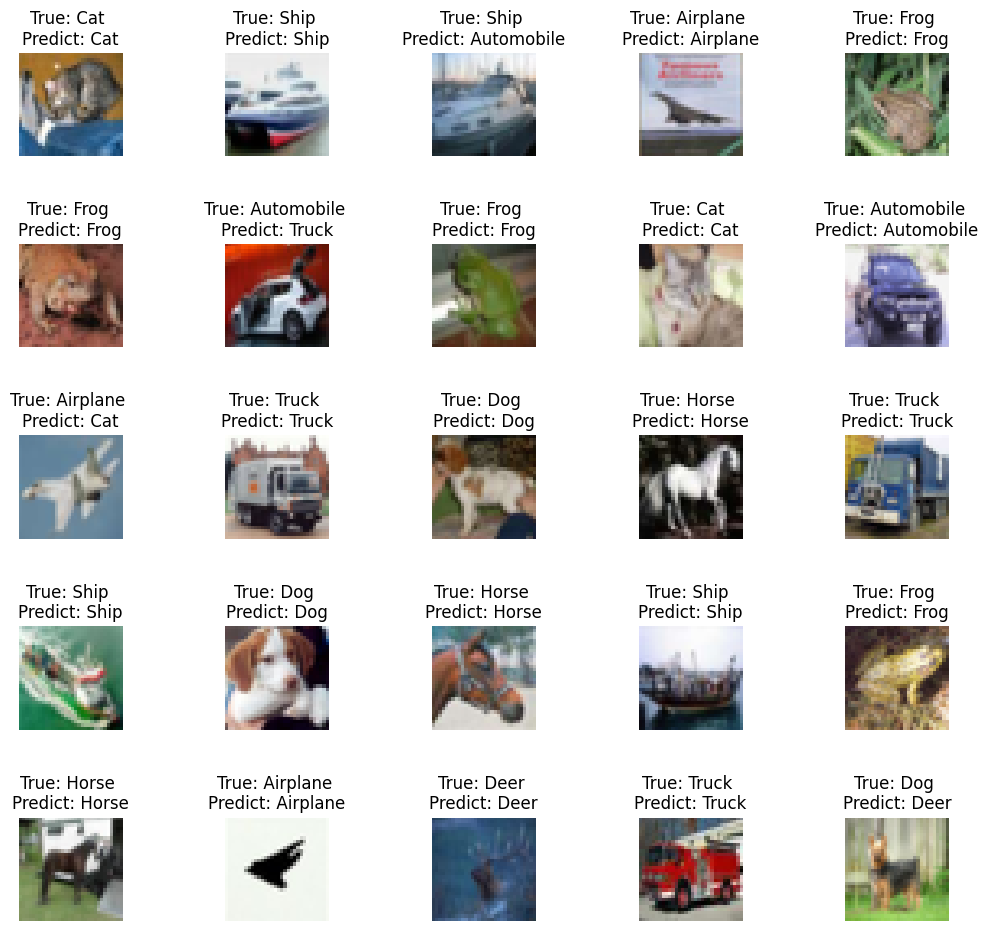

In [13]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()
for i in np.arange(25):
    axes[i].imshow(X_test[i])
    axes[i].set_title('True: %s \nPredict: %s' % (labels[y_true[i]], labels[y_pred[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

-  Buatlah model CNN untuk klasifikasi dataset MNIST.

# **Langkah 1: Memuat Dataset MNIST**

In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Memuat dataset MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# **Langkah 2: Normalisasi Gambar ke Rentang [0, 1]**

In [15]:
# Normalisasi gambar ke rentang [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# **Langkah 3: Mengonversi Label ke Format One-Hot Encoding**

In [16]:
# Perbaikan: Mengimpor to_categorical dari tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical

# Mengonversi label ke format one-hot encoding
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# **Langkah 4: Menampilkan Informasi tentang Dataset**

In [17]:
# Menampilkan informasi tentang dataset
print("Jumlah data latihan:", len(train_images))
print("Jumlah data pengujian:", len(test_images))
print("Ukuran gambar:", train_images[0].shape)

Jumlah data latihan: 60000
Jumlah data pengujian: 10000
Ukuran gambar: (28, 28)


# **Langkah 5: Membangun Model**

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Membangun model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# **Langkah 6: Mengompilasi Model**

In [19]:
# Mengompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# **Langkah 7: Menampilkan Ringkasan Model**

In [20]:
# Menampilkan ringkasan model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

# **Langkah 8: Melatih Model**

In [21]:
# Melatih model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, verbose=2, validation_split=0.3)

Epoch 1/10
329/329 - 5s - loss: 0.3880 - accuracy: 0.8780 - val_loss: 0.1029 - val_accuracy: 0.9684 - 5s/epoch - 16ms/step
Epoch 2/10
329/329 - 2s - loss: 0.0954 - accuracy: 0.9714 - val_loss: 0.0561 - val_accuracy: 0.9828 - 2s/epoch - 6ms/step
Epoch 3/10
329/329 - 2s - loss: 0.0634 - accuracy: 0.9811 - val_loss: 0.0512 - val_accuracy: 0.9848 - 2s/epoch - 5ms/step
Epoch 4/10
329/329 - 2s - loss: 0.0507 - accuracy: 0.9850 - val_loss: 0.0533 - val_accuracy: 0.9848 - 2s/epoch - 6ms/step
Epoch 5/10
329/329 - 2s - loss: 0.0445 - accuracy: 0.9860 - val_loss: 0.0443 - val_accuracy: 0.9881 - 2s/epoch - 6ms/step
Epoch 6/10
329/329 - 2s - loss: 0.0346 - accuracy: 0.9901 - val_loss: 0.0469 - val_accuracy: 0.9873 - 2s/epoch - 6ms/step
Epoch 7/10
329/329 - 2s - loss: 0.0317 - accuracy: 0.9902 - val_loss: 0.0387 - val_accuracy: 0.9886 - 2s/epoch - 7ms/step
Epoch 8/10
329/329 - 2s - loss: 0.0237 - accuracy: 0.9927 - val_loss: 0.0401 - val_accuracy: 0.9901 - 2s/epoch - 5ms/step
Epoch 9/10
329/329 - 2s

# **Langkah 9: Plot Sejarah Pelatihan**

Text(0.5, 1.0, 'Loss Pelatihan dan Validasi')

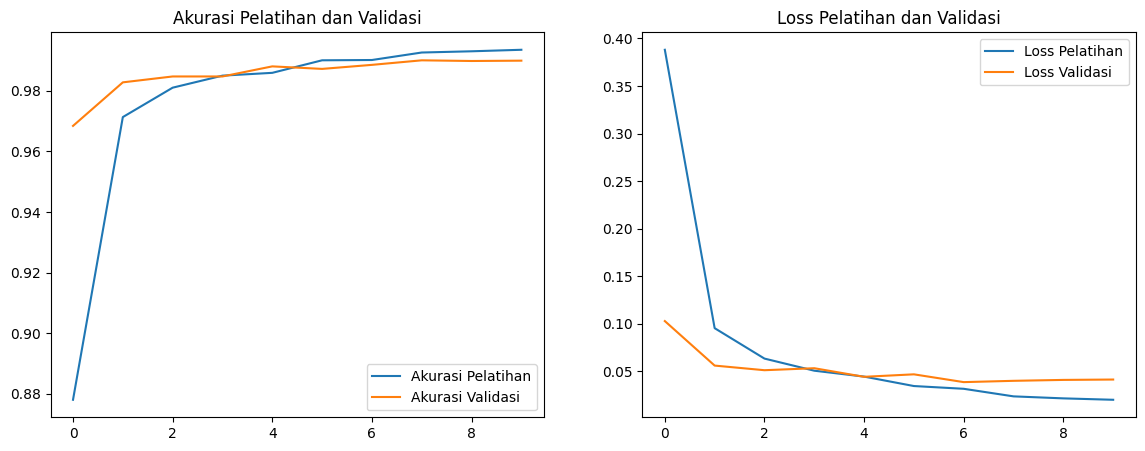

In [22]:
import matplotlib.pyplot as plt

# Plot sejarah pelatihan
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.legend(loc='lower right')
plt.title('Akurasi Pelatihan dan Validasi')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.legend(loc='upper right')
plt.title('Loss Pelatihan dan Validasi')

# **Langkah 10: Evaluasi Model pada Kumpulan Data Uji**

In [23]:
# Evaluasi model pada kumpulan data uji
validation_loss, validation_accuracy = model.evaluate(test_images, test_labels, verbose=False)
print("Loss Validasi:", validation_loss)
print("Akurasi Validasi:", validation_accuracy)

Loss Validasi: 0.029380908235907555
Akurasi Validasi: 0.9914000034332275


# **Langkah 11: Menghasilkan Nilai Prediksi pada Kumpulan Data Uji**

In [24]:
# Menghasilkan nilai prediksi pada kumpulan data uji
y_pred_enc = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


# **Langkah 12: Mendekode Nilai Prediksi**

In [25]:
# Mendekode nilai prediksi
y_pred = [np.argmax(i) for i in y_pred_enc]

# **Langkah 13: Menampilkan Laporan Klasifikasi**

In [26]:
# Menampilkan laporan klasifikasi
print(classification_report(np.argmax(test_labels, axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# **Langkah 14: Membuat Matriks Konfusi dan Menampilkannya dengan Heatmap**

Text(58.222222222222214, 0.5, 'Aktual')

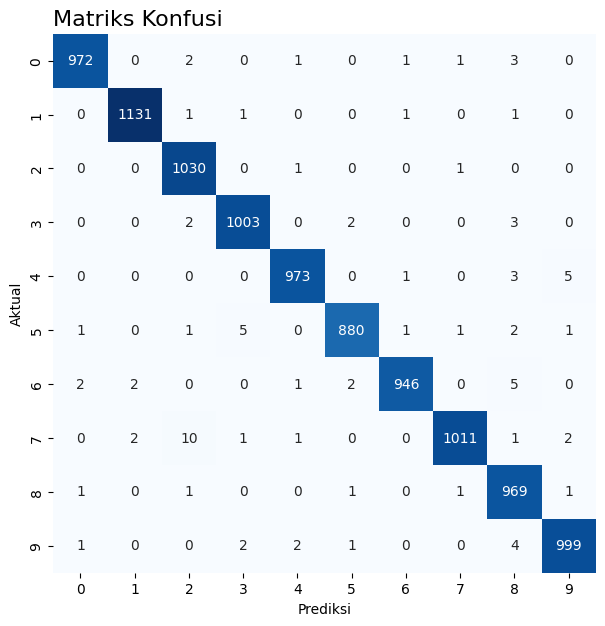

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Membuat matriks konfusi dan menampilkannya dengan heatmap
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(np.argmax(test_labels, axis=1), y_pred), annot=True, cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Matriks Konfusi', loc='left', fontsize=16)
ax.set_xlabel('Prediksi')
ax.set_ylabel('Aktual')

# **Langkah 15: Menampilkan Target yang Diprediksi pada Setiap Gambar (Label di atas gambar adalah label yang diprediksi)**

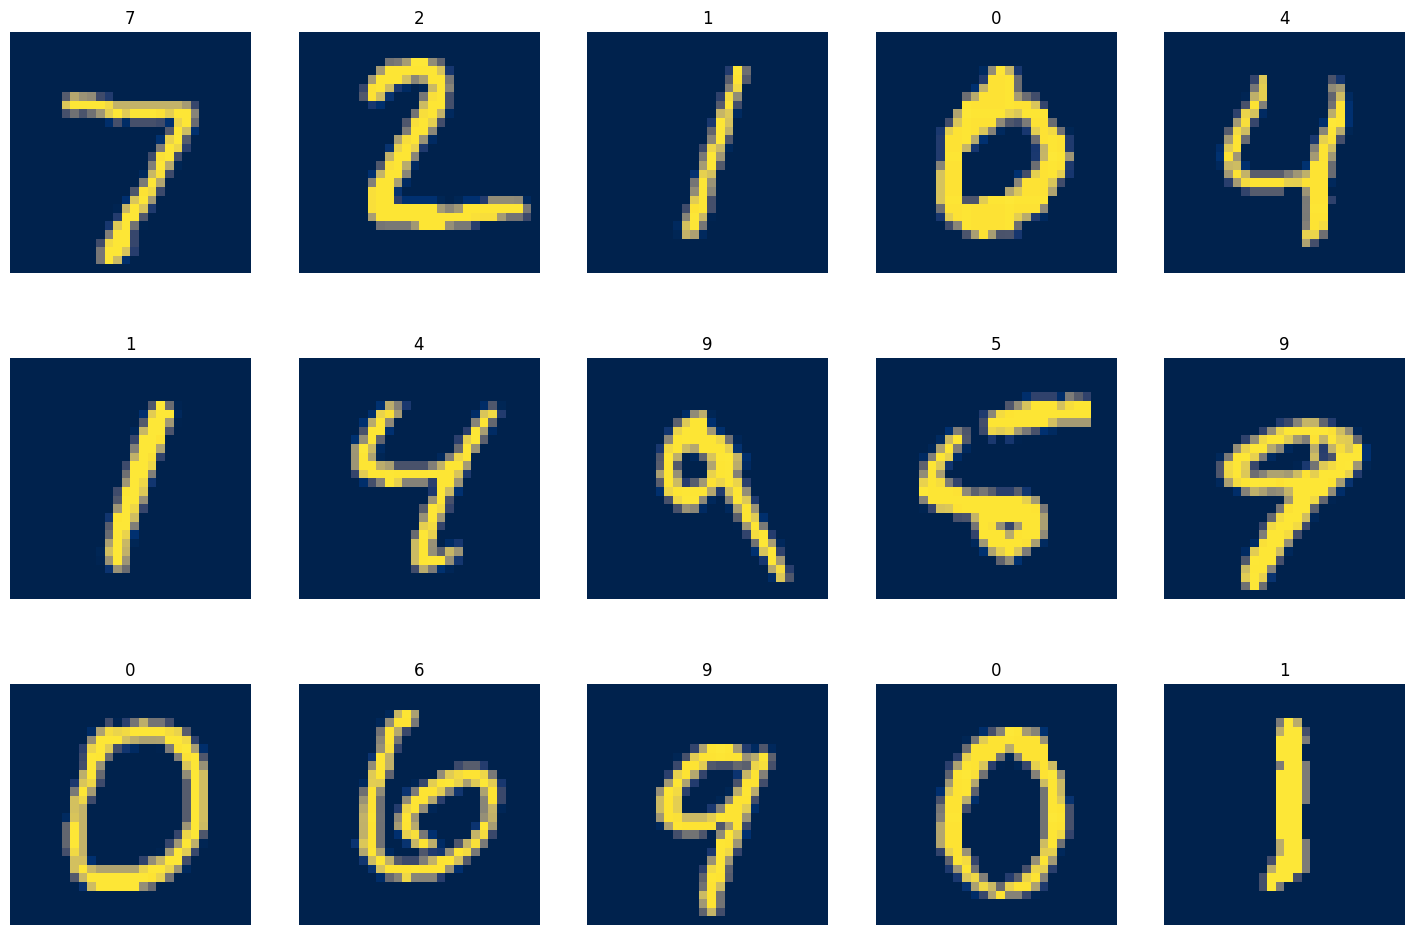

In [28]:
# Menampilkan target yang diprediksi pada setiap gambar
# (label di atas gambar adalah label yang diprediksi)
plt.figure(figsize=(18, 12))
for ind, row in enumerate(test_images[:15]):
    plt.subplot(3, 5, ind+1)
    plt.title(y_pred[ind])
    img = row.reshape(28, 28)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')